In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("./gpu_notebooks/Pytorch_MNIST"))

['README', 'sample_submission.csv', 'train.csv.zip', 'test.csv.zip']


In [2]:
!nvidia-smi

Wed Jun 16 18:31:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   31C    P8    14W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sklearn
import sklearn.model_selection
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [5]:
torch.cuda.is_available()

True

In [6]:
train_df = pd.read_csv('./train.csv')

In [7]:
test_df = pd.read_csv('./test.csv')

In [8]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train_all = train_df.loc[:, train_df.columns != "label"].values.reshape((-1, 28, 28)) / 255
y_train_all = train_df['label'].values
X_test = test_df.loc[:, test_df.columns != "label"].values.reshape((-1, 28, 28)) / 255

print('X_train_all.shape: {}'.format(X_train_all.shape))
print('X_train_all.__class__: {}'.format(X_train_all.__class__))
print('y_train_all.shape: {}'.format(y_train_all.shape))
print('y_train_all.__class__: {}'.format(y_train_all.__class__))
print('X_test.shape: {}'.format(X_test.shape))
print('X_test.__class__: {}'.format(X_test.__class__))

X_train_all.shape: (42000, 28, 28)
X_train_all.__class__: <class 'numpy.ndarray'>
y_train_all.shape: (42000,)
y_train_all.__class__: <class 'numpy.ndarray'>
X_test.shape: (28000, 28, 28)
X_test.__class__: <class 'numpy.ndarray'>


In [10]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X_train_all,
    y_train_all,
    test_size=0.1,
    shuffle=True,
    stratify=y_train_all,
    random_state=79508,
)

print('X_train.shape: {}'.format(X_train.shape))
print('X_val.shape: {}'.format(X_val.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('y_val.shape: {}'.format(y_val.shape))

X_train.shape: (37800, 28, 28)
X_val.shape: (4200, 28, 28)
y_train.shape: (37800,)
y_val.shape: (4200,)


In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

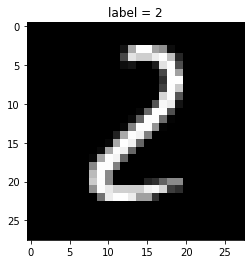

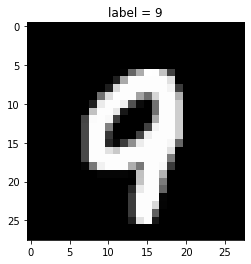

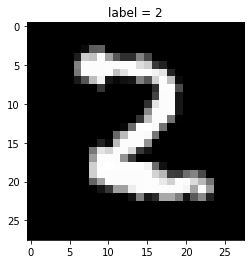

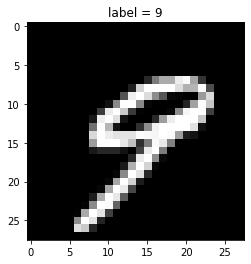

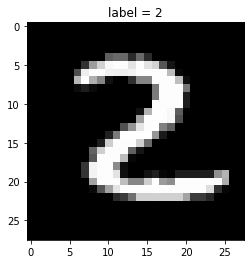

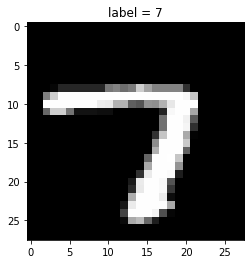

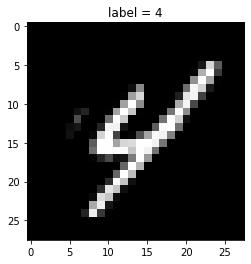

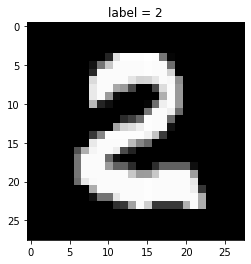

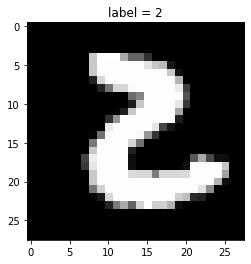

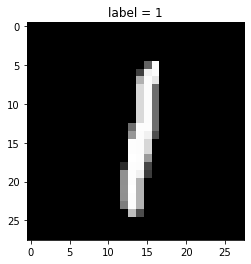

In [12]:
for i in range(10):
    plt.imshow(X_train[i], cmap='gray')
    plt.title('label = {}'.format(y_train[i]))
    plt.show()

In [13]:
y_unq = np.unique(y_train_all)
y_unq

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

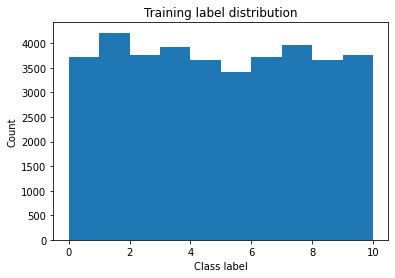

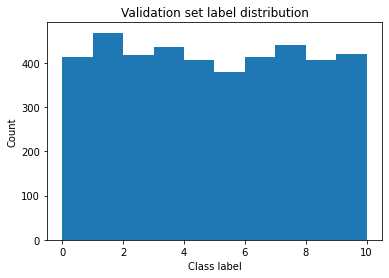

In [14]:
bin_edges = np.concatenate([y_unq, y_unq[[-1]] + 1])
plt.hist(y_train, bins=bin_edges)
plt.xlabel('Class label')
plt.ylabel('Count')
plt.title('Training label distribution')
plt.show()
plt.hist(y_val, bins=bin_edges)
plt.xlabel('Class label')
plt.ylabel('Count')
plt.title('Validation set label distribution')
plt.show()